In [ ]:
# Importar librerías
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler

In [ ]:
# Lectura del dataset
from google.colab import drive
drive.mount('/content/drive')

ruta = "/content/drive/MyDrive/PROYECTOI/Churn_Modelling.csv"
data = pd.read_csv(ruta)

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
# Ver las primeras filas del dataset
data.head()

# Información general sobre las columnas, tipos de datos y valores nulos
data.info()

# Estadísticas descriptivas de las variables numéricas
data.describe()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 14 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   RowNumber        10000 non-null  int64  
 1   CustomerId       10000 non-null  int64  
 2   Surname          10000 non-null  object 
 3   CreditScore      10000 non-null  int64  
 4   Geography        10000 non-null  object 
 5   Gender           10000 non-null  object 
 6   Age              10000 non-null  int64  
 7   Tenure           10000 non-null  int64  
 8   Balance          10000 non-null  float64
 9   NumOfProducts    10000 non-null  int64  
 10  HasCrCard        10000 non-null  int64  
 11  IsActiveMember   10000 non-null  int64  
 12  EstimatedSalary  10000 non-null  float64
 13  Exited           10000 non-null  int64  
dtypes: float64(2), int64(9), object(3)
memory usage: 1.1+ MB


,RowNumber,CustomerId,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
count,10000.00000,1.000000e+04,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.00000,10000.000000,10000.000000,10000.000000
mean,5000.50000,1.569094e+07,650.528800,38.921800,5.012800,76485.889288,1.530200,0.70550,0.515100,100090.239881,0.203700
std,2886.89568,7.193619e+04,96.653299,10.487806,2.892174,62397.405202,0.581654,0.45584,0.499797,57510.492818,0.402769
min,1.00000,1.556570e+07,350.000000,18.000000,0.000000,0.000000,1.000000,0.00000,0.000000,11.580000,0.000000
25%,2500.75000,1.562853e+07,584.000000,32.000000,3.000000,0.000000,1.000000,0.00000,0.000000,51002.110000,0.000000
50%,5000.50000,1.569074e+07,652.000000,37.000000,5.000000,97198.540000,1.000000,1.00000,1.000000,100193.915000,0.000000
75%,7500.25000,1.575323e+07,718.000000,44.000000,7.000000,127644.240000,2.000000,1.00000,1.000000,149388.247500,0.000000
max,10000.00000,1.581569e+07,850.000000,92.000000,10.000000,250898.090000,4.000000,1.00000,1.000000,199992.480000,1.000000


In [ ]:
# Verificar si hay valores nulos en el dataset
data.isnull().sum()


,0
RowNumber,0
CustomerId,0
Surname,0
CreditScore,0
Geography,0
Gender,0
Age,0
Tenure,0
Balance,0
NumOfProducts,0


In [ ]:
# Eliminar columnas irrelevantes
data = data.drop(columns=['RowNumber', 'CustomerId', 'Surname'])

# Verificar que las columnas se hayan eliminado correctamente
data.head()

,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0


In [ ]:
# Verificar si hay filas duplicadas en el dataset
data.duplicated().sum()

0

In [ ]:
# Convertir las columnas 'Geography' y 'Gender' en variables dummy
data = pd.get_dummies(data, columns=['Geography', 'Gender'], drop_first=True)

# Mostrar las primeras filas para verificar las nuevas columnas
print(data.head())

# Mostrar los tipos de datos de las columnas
print("\nTipos de datos de las columnas:")
print(data.dtypes)

   CreditScore  Age  Tenure    Balance  NumOfProducts  HasCrCard  \
0          619   42       2       0.00              1          1   
1          608   41       1   83807.86              1          0   
2          502   42       8  159660.80              3          1   
3          699   39       1       0.00              2          0   
4          850   43       2  125510.82              1          1   

   IsActiveMember  EstimatedSalary  Exited  Geography_Germany  \
0               1        101348.88       1              False   
1               1        112542.58       0              False   
2               0        113931.57       1              False   
3               0         93826.63       0              False   
4               1         79084.10       0              False   

   Geography_Spain  Gender_Male  
0            False        False  
1             True        False  
2            False        False  
3            False        False  
4             True        Fals

In [ ]:
# Definir las columnas numéricas que necesitamos escalar
numerical_columns = ['CreditScore', 'Age', 'Balance', 'NumOfProducts', 'EstimatedSalary']

# Crear el objeto scaler
scaler = StandardScaler()

# Escalar las variables numéricas
data[numerical_columns] = scaler.fit_transform(data[numerical_columns])

# Verificar que las variables hayan sido escaladas correctamente
print(data[numerical_columns].head())

   CreditScore       Age   Balance  NumOfProducts  EstimatedSalary
0    -0.326221  0.293517 -1.225848      -0.911583         0.021886
1    -0.440036  0.198164  0.117350      -0.911583         0.216534
2    -1.536794  0.293517  1.333053       2.527057         0.240687
3     0.501521  0.007457 -1.225848       0.807737        -0.108918
4     2.063884  0.388871  0.785728      -0.911583        -0.365276


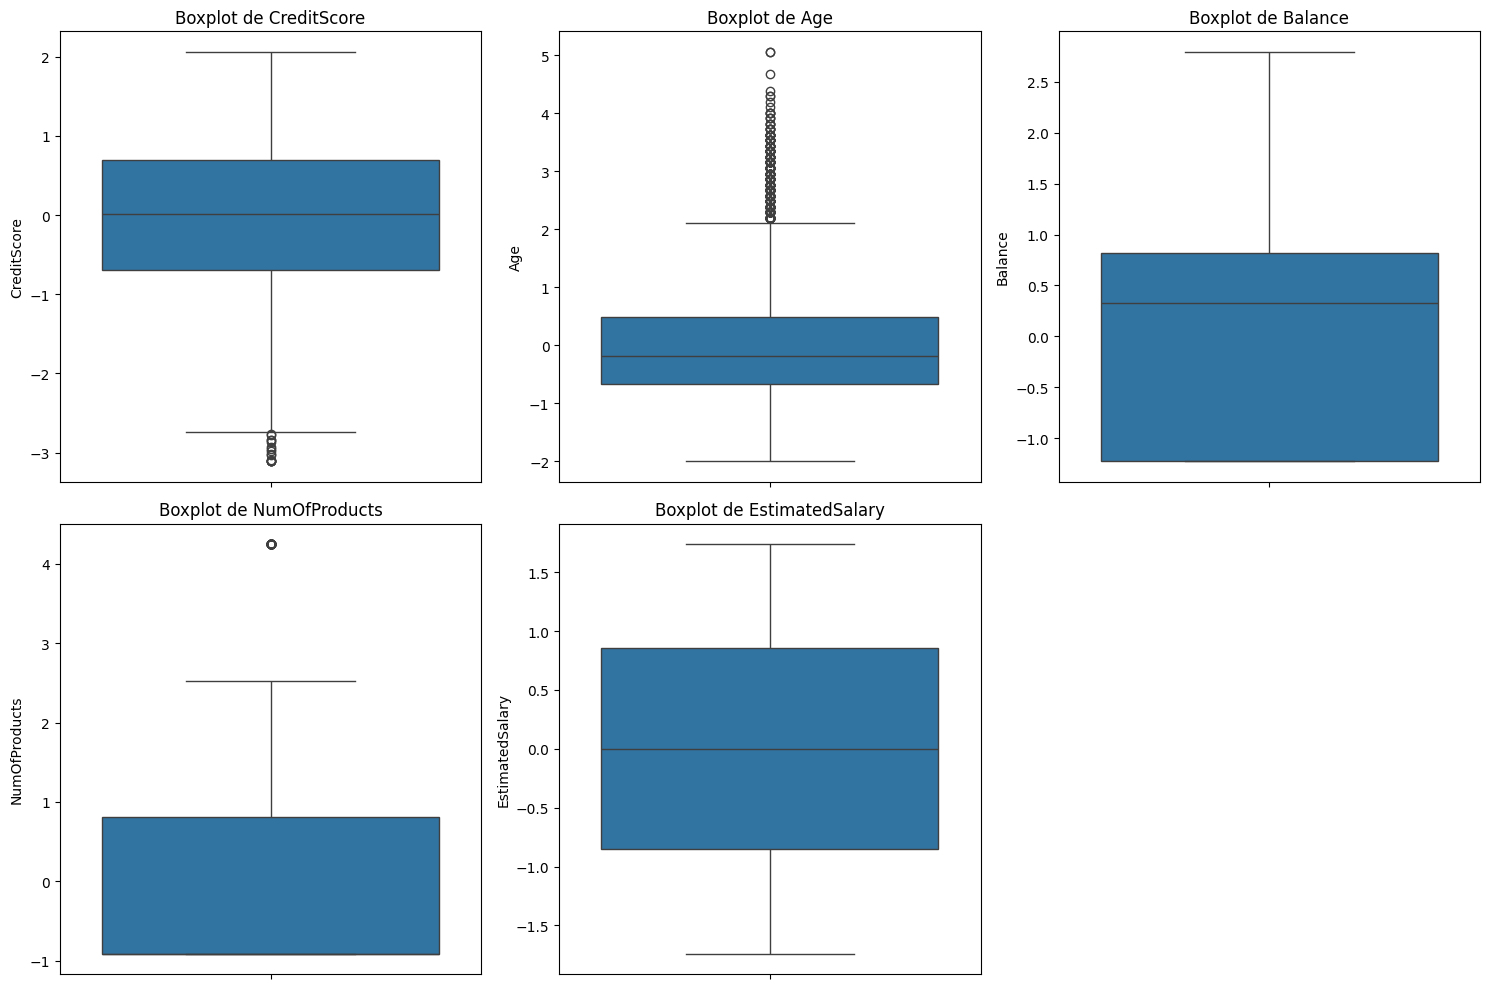

In [ ]:
# Definir las columnas numéricas a graficar
numerical_columns = ['CreditScore', 'Age', 'Balance', 'NumOfProducts', 'EstimatedSalary']

# Crear los boxplots para cada columna numérica
plt.figure(figsize=(15, 10))

for i, column in enumerate(numerical_columns, 1):
    plt.subplot(2, 3, i)  # Crear una subgráfica para cada variable
    sns.boxplot(data[column])  # Crear el boxplot para la columna
    plt.title(f'Boxplot de {column}')  # Título de la gráfica

# Ajustar el espacio entre los gráficos
plt.tight_layout()

# Mostrar los boxplots
plt.show()

In [ ]:
# Definir las columnas numéricas para las que eliminaremos los outliers
columns_to_check = ['CreditScore', 'Age', 'NumOfProducts']

# Calcular el IQR para cada columna seleccionada
Q1 = data[columns_to_check].quantile(0.25)  # Cuartil 1
Q3 = data[columns_to_check].quantile(0.75)  # Cuartil 3
IQR = Q3 - Q1  # Rango intercuartílico

# Definir los límites inferior y superior para cada columna
lower_bound = Q1 - 1.2 * IQR  # Límite inferior
upper_bound = Q3 + 1.2 * IQR  # Límite superior

# Eliminar los outliers en las columnas seleccionadas
data_no_outliers = data[~((data[columns_to_check] < lower_bound) | (data[columns_to_check] > upper_bound)).any(axis=1)]

# Verificar el tamaño de los datos después de eliminar los outliers
print(f"Datos después de eliminar outliers: {data_no_outliers.shape[0]} filas.")

Datos después de eliminar outliers: 9295 filas.


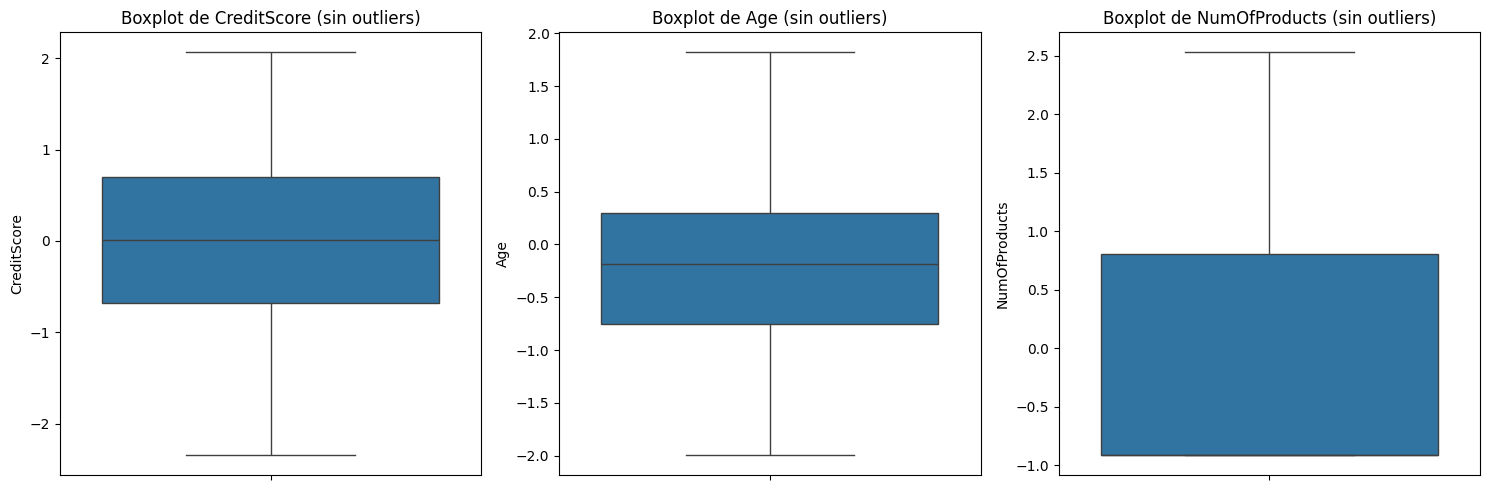

In [ ]:
# Definir las columnas numéricas para las que ya eliminamos outliers
columns_to_check = ['CreditScore', 'Age', 'NumOfProducts']

# Crear los boxplots para cada columna seleccionada sin outliers
plt.figure(figsize=(15, 5))

for i, column in enumerate(columns_to_check, 1):
    plt.subplot(1, 3, i)  # Crear una subgráfica por cada variable
    sns.boxplot(data=data_no_outliers[column])  # Crear el boxplot para la columna
    plt.title(f'Boxplot de {column} (sin outliers)')  # Título de la gráfica

# Ajustar el espacio entre los gráficos
plt.tight_layout()

# Mostrar los boxplots
plt.show()

In [ ]:
# 1. Verificar si hay valores nulos
print("Valores nulos por columna:")
print(data.isnull().sum().to_string())
print("\n")

# 2. Verificar los tipos de datos de las columnas
print("Tipos de datos de las columnas:")
print(data.dtypes.to_string())
print("\n")

# 3. Estadísticas descriptivas (para columnas numéricas)
print("Estadísticas descriptivas antes de la normalización:")
print(data.describe().loc[['mean', 'std', 'min', 'max']].to_string())
print("\n")

# 4. Verificar el número de filas antes y después de eliminar outliers
print(f"Número de filas antes de eliminar outliers: {data.shape[0]}")
print(f"Número de filas después de eliminar outliers: {data_no_outliers.shape[0]}")
print("\n")

# 5. Verificar estadísticas de las columnas después de la normalización
print("Estadísticas después de la normalización:")
print(data_no_outliers[numerical_columns].describe().loc[['mean', 'std', 'min', 'max']].to_string())

Valores nulos por columna:
CreditScore          0
Age                  0
Tenure               0
Balance              0
NumOfProducts        0
HasCrCard            0
IsActiveMember       0
EstimatedSalary      0
Exited               0
Geography_Germany    0
Geography_Spain      0
Gender_Male          0


Tipos de datos de las columnas:
CreditScore          float64
Age                  float64
Tenure                 int64
Balance              float64
NumOfProducts        float64
HasCrCard              int64
IsActiveMember         int64
EstimatedSalary      float64
Exited                 int64
Geography_Germany       bool
Geography_Spain         bool
Gender_Male             bool


Estadísticas descriptivas antes de la normalización:
       CreditScore           Age     Tenure       Balance  NumOfProducts  HasCrCard  IsActiveMember  EstimatedSalary    Exited
mean -4.824585e-16  2.318146e-16   5.012800 -6.252776e-17   1.634248e-17    0.70550        0.515100    -2.877698e-17  0.203700
std   

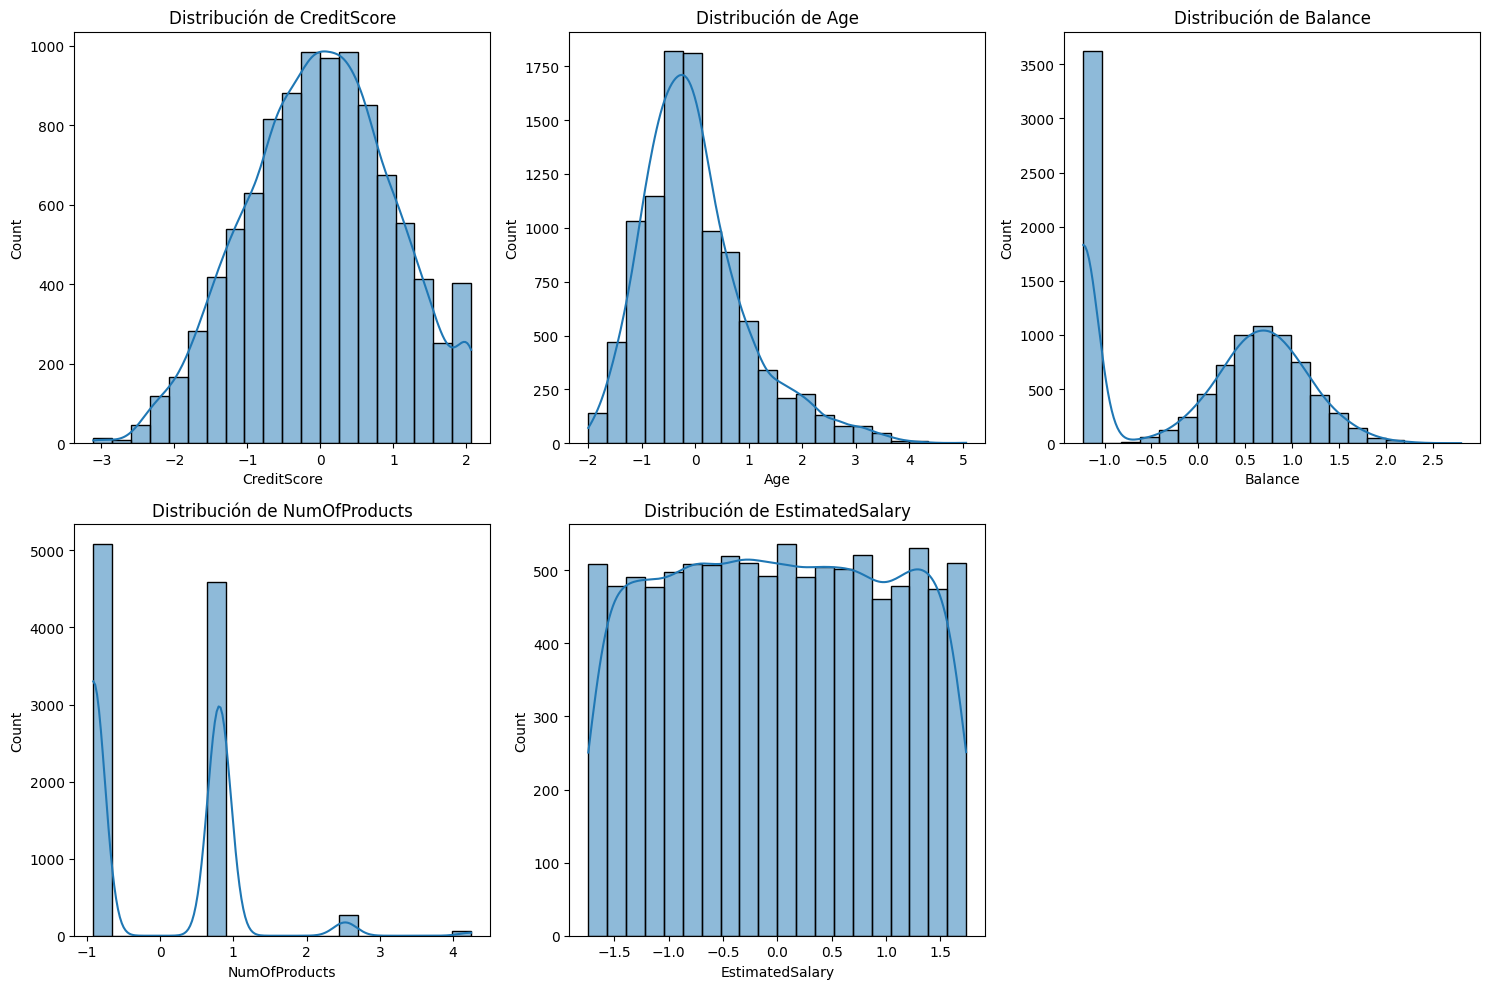

In [ ]:
# Lista de las columnas numéricas que te gustaría analizar
numerical_columns = ['CreditScore', 'Age', 'Balance', 'NumOfProducts', 'EstimatedSalary']

# Crear histogramas para cada columna
plt.figure(figsize=(15, 10))

for i, column in enumerate(numerical_columns, 1):
    plt.subplot(2, 3, i)  # Crear una subgráfica por cada variable
    sns.histplot(data[column], kde=True, bins=20)  # Histograma con línea KDE
    plt.title(f'Distribución de {column}')  # Título para cada gráfico

# Ajustar el espacio entre las gráficas
plt.tight_layout()

# Mostrar los histogramas
plt.show()

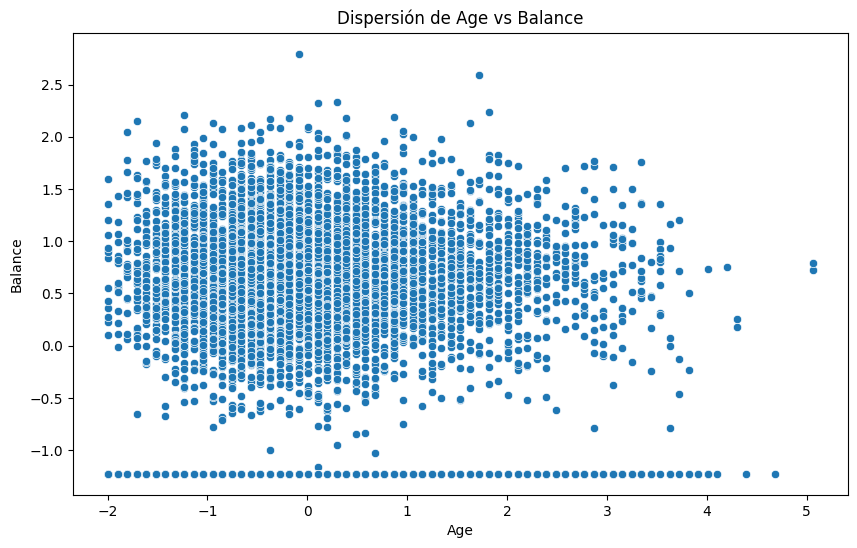

In [ ]:
# Crear un gráfico de dispersión (scatter plot) para Age vs Balance
plt.figure(figsize=(10, 6))
sns.scatterplot(x=data['Age'], y=data['Balance'])
plt.title('Dispersión de Age vs Balance')
plt.xlabel('Age')
plt.ylabel('Balance')
plt.show()

In [ ]:
# Exportamos el nuevo dataset limpio

ruta = "/content/drive/MyDrive/PROYECTOI/Dataset_Nuevo.csv"
data.to_csv(ruta, index=False)